In [3]:
from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import MinMaxScaler #for various scaling methods
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices

In [4]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [6]:
df = pd.read_csv('classification_dataset.csv')
df.head()

density_per_km   latitude  longitude  maxtempC  mintempC  totalSnow_cm  \
0    12625.800781 -34.603684 -58.381559        24         7           0.0   
1    12625.800781 -34.603684 -58.381559        24         7           0.0   
2    12625.800781 -34.603684 -58.381559        24         7           0.0   
3    12625.800781 -34.603684 -58.381559        24         7           0.0   
4    12625.800781 -34.603684 -58.381559        22        10           0.0   

   sunHour  moon_illumination  DewPointC  WindGustKmph  cloudcover  humidity  \
0     11.6                 87          6            16           0        59   
1     11.6                 87          6            16           0        59   
2     11.6                 87          6            16           0        59   
3     11.6                 87          6            16           0        59   
4     11.5                 76         10            27          34        72   

   precipMM  pressure  visibility  winddirDegree  year  month  Target  
0       0.0      1018          10            189  2016      3       1  
1       0.0      1018          10            189  2016      3       0  
2       0.0      1018          10            189  2016      3       1  
3       0.0      1018          10            189  2016      3       0  
4       0.0      1025          10             99  2016      3       0

In [7]:
df.shape

(155223, 19)

In [8]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

In [9]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [10]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [11]:
df.shape

(75345, 19)

## Feature Scaling

In [12]:
feature_scale = [feature for feature in df.columns if feature not in ['Target']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

Target  density_per_km  latitude  longitude  maxtempC  mintempC  \
0       1        0.505636  0.196981   0.742734  0.641791  0.567164   
1       0        0.505636  0.196981   0.742734  0.641791  0.567164   
2       0        0.505636  0.196981   0.742734  0.611940  0.611940   
3       1        0.505636  0.196981   0.742734  0.611940  0.611940   
4       0        0.505636  0.196981   0.742734  0.611940  0.731343   

   totalSnow_cm   sunHour  moon_illumination  DewPointC  WindGustKmph  \
0           0.0  0.625806               0.87   0.622642      0.164835   
1           0.0  0.625806               0.87   0.622642      0.164835   
2           0.0  0.619355               0.76   0.698113      0.285714   
3           0.0  0.619355               0.76   0.698113      0.285714   
4           0.0  0.432258               0.26   0.792453      0.175824   

   cloudcover  humidity  precipMM  pressure  visibility  winddirDegree  \
0        0.00  0.559140  0.000000  0.602941         1.0       0.531429   
1        0.00  0.559140  0.000000  0.602941         1.0       0.531429   
2        0.34  0.698925  0.000000  0.705882         1.0       0.274286   
3        0.34  0.698925  0.000000  0.705882         1.0       0.274286   
4        0.61  0.763441  0.097011  0.558824         0.8       0.291429   

       year     month  
0  0.333333  0.181818  
1  0.333333  0.181818  
2  0.333333  0.181818  
3  0.333333  0.181818  
4  0.333333  0.272727

# Train Test split

In [13]:
X = data.drop('Target',axis=1)
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10, stratify=y) #train test split in 50:50 ratio

In [14]:
X_train.head()

density_per_km  latitude  longitude  maxtempC  mintempC  totalSnow_cm  \
9747         0.002883  0.588673   0.563257  0.537313  0.597015           0.0   
26293        0.000128  0.565977   0.552531  0.626866  0.701493           0.0   
41021        0.004803  0.645345   0.577569  0.791045  0.850746           0.0   
12705        0.001296  0.579009   0.530510  0.671642  0.701493           0.0   
48883        0.000317  0.582719   0.525652  0.641791  0.656716           0.0   

        sunHour  moon_illumination  DewPointC  WindGustKmph  cloudcover  \
9747   0.625806               0.34   0.698113      0.087912        0.47   
26293  0.554839               0.48   0.849057      0.054945        0.56   
41021  0.625806               0.81   0.924528      0.252747        0.18   
12705  0.625806               0.14   0.792453      0.065934        0.21   
48883  0.625806               0.02   0.754717      0.021978        0.33   

       humidity  precipMM  pressure  visibility  winddirDegree      year  \
9747   0.849462  0.006155  0.529412         0.6       0.437143  0.333333   
26293  0.881720  0.118406  0.558824         0.7       0.742857  0.333333   
41021  0.623656  0.007327  0.470588         1.0       0.225714  0.333333   
12705  0.731183  0.027550  0.529412         0.9       0.600000  0.333333   
48883  0.698925  0.030481  0.544118         0.9       0.397143  0.333333   

          month  
9747   0.090909  
26293  0.363636  
41021  0.636364  
12705  0.181818  
48883  0.818182

# CatBoost

In [115]:
from catboost import CatBoostClassifier

# Initiate the Catboost Classifier
# this is a binary classification problem I will use log loss as the loss function and evaluate based on accuracy
catModel1 = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy',verbose=False)
catModel1.fit(X_train,y_train)
catpredTrain = catModel1.predict(X_train)
print('Accuracy of Training data :{:.4f}'.format(accuracy_score(y_train,catpredTrain)))

catpredTest = catModel1.predict(X_test)
print('\nAccuracy of Testing data :{:.4f}'.format(accuracy_score(y_test,catpredTest)))

Accuracy of Training data :0.6759

Accuracy of Testing data :0.5770


### K Fold Cross Validation

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validation=KFold(10)

model = CatBoostClassifier() 
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print('Max :',np.max(results))
print('Min :',np.min(results))
print('Mean :',np.mean(results))

Learning rate set to 0.062359
0:	learn: 0.6879939	total: 53.7ms	remaining: 53.6s
1:	learn: 0.6843944	total: 112ms	remaining: 55.9s
2:	learn: 0.6803256	total: 179ms	remaining: 59.4s
3:	learn: 0.6773482	total: 240ms	remaining: 59.7s
4:	learn: 0.6739041	total: 308ms	remaining: 1m 1s
5:	learn: 0.6715777	total: 337ms	remaining: 55.8s
6:	learn: 0.6697032	total: 366ms	remaining: 51.9s
7:	learn: 0.6682379	total: 396ms	remaining: 49.1s
8:	learn: 0.6663976	total: 428ms	remaining: 47.1s
9:	learn: 0.6648095	total: 489ms	remaining: 48.4s
10:	learn: 0.6632118	total: 545ms	remaining: 49s
11:	learn: 0.6615747	total: 605ms	remaining: 49.8s
12:	learn: 0.6604846	total: 633ms	remaining: 48.1s
13:	learn: 0.6594293	total: 656ms	remaining: 46.2s
14:	learn: 0.6583407	total: 679ms	remaining: 44.6s
15:	learn: 0.6570364	total: 702ms	remaining: 43.2s
16:	learn: 0.6561806	total: 728ms	remaining: 42.1s
17:	learn: 0.6553490	total: 753ms	remaining: 41.1s
18:	learn: 0.6548536	total: 779ms	remaining: 40.2s
19:	learn: 0

In [27]:
print(results)
print('Max :',np.max(results))
print('Min :',np.min(results))
print('Mean :',np.mean(results))

[0.57889847 0.5924353  0.59057731 0.58380889 0.58142004 0.5826918
 0.58216087 0.49070879 0.50146005 0.53384656]
Max : 0.592435301924353
Min : 0.4907087868330236
Mean : 0.561800807804443


### Stratified K-fold Cross Validation

In [28]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model = CatBoostClassifier() 
scores=cross_val_score(model,X,y,cv=skfold)

Learning rate set to 0.062359
0:	learn: 0.6868514	total: 23.7ms	remaining: 23.7s
1:	learn: 0.6824205	total: 47.1ms	remaining: 23.5s
2:	learn: 0.6775864	total: 69.1ms	remaining: 23s
3:	learn: 0.6734324	total: 91.3ms	remaining: 22.7s
4:	learn: 0.6696986	total: 116ms	remaining: 23.2s
5:	learn: 0.6669088	total: 138ms	remaining: 22.8s
6:	learn: 0.6645350	total: 161ms	remaining: 22.9s
7:	learn: 0.6623890	total: 184ms	remaining: 22.8s
8:	learn: 0.6607085	total: 210ms	remaining: 23.1s
9:	learn: 0.6587650	total: 233ms	remaining: 23s
10:	learn: 0.6564537	total: 255ms	remaining: 22.9s
11:	learn: 0.6544432	total: 278ms	remaining: 22.9s
12:	learn: 0.6533051	total: 300ms	remaining: 22.8s
13:	learn: 0.6516822	total: 325ms	remaining: 22.9s
14:	learn: 0.6490075	total: 348ms	remaining: 22.9s
15:	learn: 0.6479535	total: 371ms	remaining: 22.8s
16:	learn: 0.6458893	total: 393ms	remaining: 22.7s
17:	learn: 0.6447774	total: 414ms	remaining: 22.6s
18:	learn: 0.6439537	total: 437ms	remaining: 22.6s
19:	learn: 

In [29]:
scores

array([0.52209688, 0.24140677, 0.14797611, 0.10272064, 0.06489715,
       0.01207858, 0.00623839, 0.13472259, 0.35983541, 0.42208654])

In [30]:
print('Max :',np.max(scores))
print('Min :',np.min(scores))
print('Mean :',np.mean(scores))

Max : 0.5220968812209689
Min : 0.00623838598354128
Mean : 0.20140590526221408


## Graphical Analysis

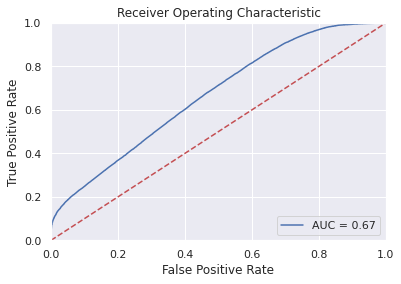

In [31]:
from sklearn.metrics import roc_curve, auc

probs               = catModel1.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Tuning CatBoost Hyperparameters


## 1. Manual Tuning

In [39]:
#Instantiate CatBoostClassifier, using a maximum depth of 3
cbc = CatBoostClassifier(max_depth=3,task_type = "GPU")

# 5 folds, scored on accuracy
cvs = cross_val_score(cbc, X_train, y_train, cv=5, scoring='accuracy', verbose= False)

#Instantiate CatBoostClassifier, using a maximum depth of 5
cbc1 = CatBoostClassifier(max_depth=5,task_type = "GPU")

# 5 folds, scored on accuracy
cvs1 = cross_val_score(cbc1, X_train,y_train, cv=5, scoring='accuracy', verbose= False)

Learning rate set to 0.027953
0:	learn: 0.6917207	total: 23.8ms	remaining: 23.7s
1:	learn: 0.6907113	total: 46.2ms	remaining: 23s
2:	learn: 0.6895544	total: 68.7ms	remaining: 22.8s
3:	learn: 0.6882049	total: 91.1ms	remaining: 22.7s
4:	learn: 0.6873167	total: 117ms	remaining: 23.3s
5:	learn: 0.6862915	total: 140ms	remaining: 23.1s
6:	learn: 0.6850987	total: 162ms	remaining: 23s
7:	learn: 0.6841140	total: 184ms	remaining: 22.8s
8:	learn: 0.6831087	total: 211ms	remaining: 23.3s
9:	learn: 0.6822840	total: 234ms	remaining: 23.2s
10:	learn: 0.6815260	total: 257ms	remaining: 23.1s
11:	learn: 0.6807322	total: 279ms	remaining: 23s
12:	learn: 0.6797653	total: 301ms	remaining: 22.9s
13:	learn: 0.6789821	total: 326ms	remaining: 23s
14:	learn: 0.6784585	total: 348ms	remaining: 22.9s
15:	learn: 0.6777510	total: 376ms	remaining: 23.1s
16:	learn: 0.6765370	total: 399ms	remaining: 23.1s
17:	learn: 0.6758058	total: 421ms	remaining: 23s
18:	learn: 0.6753579	total: 444ms	remaining: 22.9s
19:	learn: 0.6747

In [40]:
#Mean value of cross validation score
print(f'The mean value of cross val score is {cvs.mean()}')
print(f'The mean value of cross val score is {cvs1.mean()}')

The mean value of cross val score is 0.5998885230573402
The mean value of cross val score is 0.6006317743108041


Here we see the effect of maximum depth on the model’s performance. In this example, an increase in maximum depth results in an increase in the performance of the model. This may not be true for all cases.

## 2. Grid Search
1. depth
1. learning_rate
1. iterations

In [ ]:
from sklearn.model_selection import GridSearchCV 

CBC = CatBoostClassifier(task_type = "GPU")
parameters = {'depth' : [4,5,6,7,8,9, 10],
            'learning_rate' : [0.01,0.02,0.03,0.04],
            'iterations' : [10, 20,30,40,50,60,70,80,90, 100]}
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 3, verbose=2)
Grid_CBC.fit(X_train, y_train)

Fitting 3 folds for each of 280 candidates, totalling 840 fits
[CV] depth=4, iterations=10, learning_rate=0.01 ......................
0:	learn: 0.6926158	total: 4.94ms	remaining: 44.5ms
1:	learn: 0.6921577	total: 8.19ms	remaining: 32.8ms
2:	learn: 0.6916668	total: 11.5ms	remaining: 26.8ms
3:	learn: 0.6912128	total: 14.6ms	remaining: 21.9ms
4:	learn: 0.6907420	total: 17.7ms	remaining: 17.7ms
5:	learn: 0.6903111	total: 20.9ms	remaining: 13.9ms
6:	learn: 0.6899407	total: 24ms	remaining: 10.3ms
7:	learn: 0.6894924	total: 27.2ms	remaining: 6.8ms
8:	learn: 0.6890520	total: 30.4ms	remaining: 3.38ms
9:	learn: 0.6886222	total: 33.4ms	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... depth=4, iterations=10, learning_rate=0.01, total=   0.2s
[CV] depth=4, iterations=10, learning_rate=0.01 ......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


0:	learn: 0.6926279	total: 4.24ms	remaining: 38.2ms
1:	learn: 0.6921761	total: 7.36ms	remaining: 29.4ms
2:	learn: 0.6917798	total: 10.3ms	remaining: 24.1ms
3:	learn: 0.6912940	total: 13.3ms	remaining: 19.9ms
4:	learn: 0.6908176	total: 16.3ms	remaining: 16.3ms
5:	learn: 0.6903501	total: 19.3ms	remaining: 12.8ms
6:	learn: 0.6899032	total: 22.3ms	remaining: 9.54ms
7:	learn: 0.6894520	total: 25.3ms	remaining: 6.32ms
8:	learn: 0.6890172	total: 28.4ms	remaining: 3.15ms
9:	learn: 0.6885843	total: 31.4ms	remaining: 0us
[CV] ....... depth=4, iterations=10, learning_rate=0.01, total=   0.7s
[CV] depth=4, iterations=10, learning_rate=0.01 ......................
0:	learn: 0.6926519	total: 4.4ms	remaining: 39.6ms
1:	learn: 0.6921894	total: 7.45ms	remaining: 29.8ms
2:	learn: 0.6917303	total: 10.5ms	remaining: 24.5ms
3:	learn: 0.6912609	total: 13.6ms	remaining: 20.3ms
4:	learn: 0.6908062	total: 16.6ms	remaining: 16.6ms
5:	learn: 0.6903635	total: 19.7ms	remaining: 13.1ms
6:	learn: 0.6899085	total: 22.

In [36]:
print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

 Results from Grid Search 

 The best score across ALL searched params:
 0.6014813063990553

 The best parameters across ALL searched params:
 {'depth': 7, 'iterations': 50, 'learning_rate': 0.04}


## 3. Grid Search
1. max_depth
2. n_estimators

In [43]:
#Instantiate CatBoostClassifier
cbc = CatBoostClassifier(task_type = "GPU")

#create the grid
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

#Instantiate GridSearchCV
gscv = GridSearchCV(estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(X_train,y_train)

Learning rate set to 0.22
0:	learn: 0.6845746	total: 4ms	remaining: 396ms
1:	learn: 0.6794013	total: 6.89ms	remaining: 338ms
2:	learn: 0.6762857	total: 9.59ms	remaining: 310ms
3:	learn: 0.6731145	total: 12.3ms	remaining: 295ms
4:	learn: 0.6692371	total: 15.1ms	remaining: 286ms
5:	learn: 0.6666095	total: 17.9ms	remaining: 280ms
6:	learn: 0.6648338	total: 20.5ms	remaining: 272ms
7:	learn: 0.6629066	total: 23.3ms	remaining: 267ms
8:	learn: 0.6617185	total: 26ms	remaining: 263ms
9:	learn: 0.6606221	total: 28.7ms	remaining: 258ms
10:	learn: 0.6594198	total: 31.4ms	remaining: 254ms
11:	learn: 0.6580395	total: 34.3ms	remaining: 252ms
12:	learn: 0.6566989	total: 37ms	remaining: 248ms
13:	learn: 0.6560931	total: 39.8ms	remaining: 245ms
14:	learn: 0.6541643	total: 42.6ms	remaining: 242ms
15:	learn: 0.6535702	total: 45.4ms	remaining: 238ms
16:	learn: 0.6530680	total: 48.1ms	remaining: 235ms
17:	learn: 0.6521382	total: 50.9ms	remaining: 232ms
18:	learn: 0.6514542	total: 53.9ms	remaining: 230ms
19:

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ff2243c4c90>,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [44]:
print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n",gscv.best_score_)
print("\n The best parameters across ALL searched params:\n",gscv.best_params_)

 Results from Grid Search 

 The best score across ALL searched params:
 0.5986940019225386

 The best parameters across ALL searched params:
 {'max_depth': 3, 'n_estimators': 300}


## 4. Grid Search
1. learning_rate
2. depth
3. l2_leaf_reg
4. iterations

In [55]:
#Instantiate CatBoostClassifier
cbc = CatBoostClassifier(task_type = "GPU")

#create the grid
grid = {'learning_rate': [0.03, 0.1],
'depth': [4, 6, 10],
'l2_leaf_reg': [1, 3, 5],
'iterations': [50, 100, 150]}

#Instantiate GridSearchCV
gridCV = GridSearchCV(estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gridCV.fit(X_train,y_train)

0:	learn: 0.6916219	total: 4.97ms	remaining: 244ms
1:	learn: 0.6905319	total: 8.29ms	remaining: 199ms
2:	learn: 0.6893748	total: 11.6ms	remaining: 182ms
3:	learn: 0.6880025	total: 14.8ms	remaining: 170ms
4:	learn: 0.6867408	total: 18.2ms	remaining: 164ms
5:	learn: 0.6854874	total: 21.5ms	remaining: 158ms
6:	learn: 0.6842441	total: 24.8ms	remaining: 153ms
7:	learn: 0.6831148	total: 28.1ms	remaining: 148ms
8:	learn: 0.6820535	total: 31.4ms	remaining: 143ms
9:	learn: 0.6809951	total: 35.3ms	remaining: 141ms
10:	learn: 0.6798793	total: 38.8ms	remaining: 137ms
11:	learn: 0.6790984	total: 41.9ms	remaining: 133ms
12:	learn: 0.6781773	total: 45.2ms	remaining: 129ms
13:	learn: 0.6773252	total: 48.5ms	remaining: 125ms
14:	learn: 0.6763284	total: 51.6ms	remaining: 120ms
15:	learn: 0.6754670	total: 54.9ms	remaining: 117ms
16:	learn: 0.6745847	total: 58.2ms	remaining: 113ms
17:	learn: 0.6737944	total: 61.6ms	remaining: 109ms
18:	learn: 0.6732121	total: 64.9ms	remaining: 106ms
19:	learn: 0.6726849	t

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ff2243f2e90>,
             param_grid={'depth': [4, 6, 10], 'iterations': [50, 100, 150],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.03, 0.1]},
             scoring='accuracy')

In [56]:
print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n",gridCV.best_score_)
print("\n The best parameters across ALL searched params:\n",gridCV.best_params_)

 Results from Grid Search 

 The best score across ALL searched params:
 0.6011364081151072

 The best parameters across ALL searched params:
 {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.03}


## Model with parameters

In [63]:
# 1. Manual tuning parameter
# max_depth =3
catModel2 = CatBoostClassifier(max_depth=3,loss_function='Logloss', eval_metric='Accuracy',verbose=False)
catModel2.fit(X_train,y_train)
catpredTest2 = catModel2.predict(X_test)
print('\nAccuracy of Model :{:.4f}'.format(accuracy_score(y_test,catpredTest2)))


Accuracy of Model :0.6020


In [62]:
# 1. Manual tuning parameter
# max_depth = 5
catModel2 = CatBoostClassifier(max_depth=5,loss_function='Logloss', eval_metric='Accuracy',verbose=False)
catModel2.fit(X_train,y_train)
catpredTest2 = catModel2.predict(X_test)
print('\nAccuracy of Model :{:.4f}'.format(accuracy_score(y_test,catpredTest2)))


Accuracy of Model :0.5911


In [64]:
# 2. Grid searh parameters
# {'depth': 7, 'iterations': 50, 'learning_rate': 0.04}
catModel2 = CatBoostClassifier(depth=7,learning_rate=0.04,n_estimators=50,loss_function='Logloss', eval_metric='Accuracy',verbose=False)
catModel2.fit(X_train,y_train)
catpredTest2 = catModel2.predict(X_test)
print('\nAccuracy of Model :{:.4f}'.format(accuracy_score(y_test,catpredTest2)))


Accuracy of Model :0.5994


In [77]:
# 2. Grid searh parameters
# {'depth': 7, 'iterations': 50, 'learning_rate': 0.04}
# changing each parameters
catModel2 = CatBoostClassifier(depth=7,learning_rate=0.01,n_estimators=500,loss_function='Logloss', eval_metric='Accuracy',verbose=False)
catModel2.fit(X_train,y_train)
catpredTest2 = catModel2.predict(X_test)
print('\nAccuracy of Model :{:.4f}'.format(accuracy_score(y_test,catpredTest2)))


Accuracy of Model :0.6006


In [83]:
# 3. Grid searh parameters
# {'max_depth': 3, 'n_estimators': 300}
catModel2 = CatBoostClassifier(max_depth=3,n_estimators=300,loss_function='Logloss', eval_metric='Accuracy',verbose=False)
catModel2.fit(X_train,y_train)
catpredTest2 = catModel2.predict(X_test)
print('\nAccuracy of Model :{:.4f}'.format(accuracy_score(y_test,catpredTest2)))


Accuracy of Model :0.6010


In [84]:
# 3. Grid searh parameters
# {'max_depth': 3, 'n_estimators': 300}
# changing each parameters
catModel2 = CatBoostClassifier(max_depth=5,n_estimators=1000,loss_function='Logloss', eval_metric='Accuracy',verbose=False)
catModel2.fit(X_train,y_train)
catpredTest2 = catModel2.predict(X_test)
print('\nAccuracy of Model :{:.4f}'.format(accuracy_score(y_test,catpredTest2)))


Accuracy of Model :0.5911


In [85]:
# 4. Grid searh parameters
# {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.03}
# changing each parameters
catModel2 = CatBoostClassifier(max_depth=6,n_estimators=100,l2_leaf_reg=3,learning_rate=0.03,loss_function='Logloss', eval_metric='Accuracy',verbose=False)
catModel2.fit(X_train,y_train)
catpredTest2 = catModel2.predict(X_test)
print('\nAccuracy of Model :{:.4f}'.format(accuracy_score(y_test,catpredTest2)))


Accuracy of Model :0.6006


In [86]:
# 4. Grid searh parameters
# {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.03}
# changing each parameters
catModel2 = CatBoostClassifier(depth=3,learning_rate=0.02,loss_function='Logloss', eval_metric='Accuracy',verbose=False)
catModel2.fit(X_train,y_train)
catpredTest2 = catModel2.predict(X_test)
print('\nAccuracy of Model :{:.4f}'.format(accuracy_score(y_test,catpredTest2)))


Accuracy of Model :0.6034


In [110]:
# 4. Grid searh parameters
# {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.03}
# changing each parameters
catModel3 = CatBoostClassifier(depth=3,learning_rate=0.02,l2_leaf_reg=5,n_estimators=1500,loss_function='Logloss', eval_metric='Accuracy',verbose=False)
catModel3.fit(X_train,y_train)
catpredTrain3 = catModel3.predict(X_test)
print('Accuracy of Training data :{:.4f}'.format(accuracy_score(y_test,catpredTrain3)))

Accuracy of Training data :0.6032


In [111]:
# 4. Grid searh parameters
# {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.03}
# changing each parameters
catModel2 = CatBoostClassifier(depth=3,learning_rate=0.02,l2_leaf_reg=10,loss_function='Logloss', eval_metric='Accuracy',verbose=False)
catModel2.fit(X_train,y_train)
catpredTest2 = catModel2.predict(X_test)
print('\nAccuracy of Model :{:.4f}'.format(accuracy_score(y_test,catpredTest2)))


Accuracy of Model :0.6040


Bestparameter: {'depth': 3, 'iterations': 1000, 'l2_leaf_reg': 10, 'learning_rate': 0.02}

## Graphical Analysis

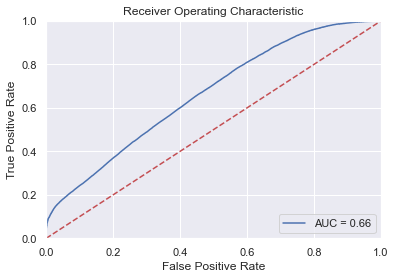

In [112]:
from sklearn.metrics import roc_curve, auc

probs               = catModel2.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [116]:
print('Accuracy before tuning :',accuracy_score(y_test,catpredTest))
print()
print('Accuracy after tuning :',accuracy_score(y_test,catpredTest2))

Accuracy before tuning : 0.5770180235181696

Accuracy after tuning : 0.6040400286677461
